<h1 > 
    <center> Project - Advanced Statistics
    </center>
</h1>

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

<h2> 
    <center> Problem 1A
    </center>
</h2>

In [3]:
df_1 = pd.read_csv('SalaryData.csv')

In [4]:
df_1.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [5]:
df_1.describe()

,Salary
count,40.000000
mean,162186.875000
std,64860.407506
min,50103.000000
25%,99897.500000
50%,169100.000000
75%,214440.750000
max,260151.000000


**1A.1 State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.**

**Education:**

- H0: Salary depend on education qualification
- H1: Salary does not depend on education
- Confidence level = 0.05

**Occupation:**

- H0: Salary depend on occupation
- H1: Salary does not depend on occupation
- Confidence level = 0.05

**1A.2 Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.**

In [64]:
df_2 = df_1[["Education","Salary"]]

high_school_graduate = df_2[df_2.Education==' HS-grad']["Salary"]

bachelor = df_2[df_2.Education==' Bachelors']["Salary"]

doctorate = df_2[df_2.Education==' Doctorate']["Salary"]

In [66]:
stats.shapiro(high_school_graduate)

ShapiroResult(statistic=0.885286271572113, pvalue=0.1783432960510254)

In [67]:
stats.shapiro(bachelor)

ShapiroResult(statistic=0.9607304334640503, pvalue=0.7050924301147461)

In [68]:
stats.shapiro(doctorate)

ShapiroResult(statistic=0.8952829837799072, pvalue=0.0675690770149231)

In [69]:
F, p = stats.f_oneway(high_school_graduate, bachelor, doctorate)

In [74]:
print('F Statistic is {:5.3f} and P is {:5.10f}'.format(F, p))

F Statistic is 30.956 and P is 0.0000000126


**1A.2 Inference:** Since P Value is less than 0.05 we **reject Null Hyposthesis**

**1A.3 Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.**

In [83]:
df_3 = df_1[["Occupation","Salary"]]

Adm_clerical = df_3[df_3.Occupation==' Adm-clerical']["Salary"]

Sales = df_3[df_3.Occupation==' Sales']["Salary"]

Prof_specialty = df_3[df_3.Occupation==' Prof-specialty']["Salary"]

Exec_managerial = df_3[df_3.Occupation==' Exec-managerial']["Salary"]

In [89]:
stats.shapiro(Adm_clerical)

ShapiroResult(statistic=0.9189430475234985, pvalue=0.34822404384613037)

In [90]:
stats.shapiro(Sales)

ShapiroResult(statistic=0.8897126913070679, pvalue=0.11683900654315948)

In [91]:
stats.shapiro(Prof_specialty)

ShapiroResult(statistic=0.736305832862854, pvalue=0.0013131146552041173)

In [92]:
stats.shapiro(Exec_managerial)

ShapiroResult(statistic=0.6901877522468567, pvalue=0.007539781276136637)

In [93]:
F, p = stats.f_oneway(Adm_clerical, Sales, Prof_specialty, Exec_managerial)

In [94]:
print('F Statistic is {:5.3f} and P is {:5.10f}'.format(F, p))

F Statistic is 0.884 and P is 0.4585078266


**1A.3 Inference:** Since P Value is less than 0.05 we **reject Null Hyposthesis**

<h2> 
    <center> Problem 1B
    </center>
</h2>

**1B.1 What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’ function from the ‘seaborn’ function]**

In [99]:
sns.set()

<AxesSubplot:xlabel='Occupation', ylabel='Salary'>

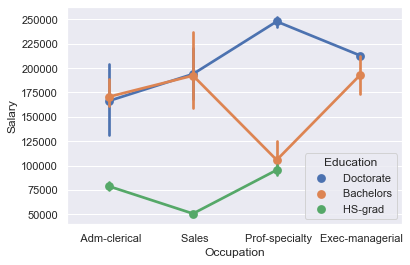

In [103]:
sns.pointplot(data=df_1, x="Occupation", y="Salary", hue="Education")

**1B.1 Inference**: Adm-clerical and Sales people with Bachelors and Doctorate Degrees earn almost similar salary
packages

**1B.2 Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?**

- H0: Salary depends on both Education and Occupation
- H1: Salary does not depend on at least one of Education and Occupation
- Confidence level = 0.05

In [104]:
model = ols(' Salary ~ C(Education) + C(Occupation)+C(Education) : C(Occupation) ' , data = df_1).fit() 
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Education),1.938753e+11,2.0,136.326521,1.756909e-12
C(Occupation),4.077417e+08,3.0,0.191140,8.270491e-01
C(Education):C(Occupation),4.227791e+10,6.0,9.909463,1.323371e-05
Residual,2.062102e+10,29.0,NaN,NaN


**1B.2 Inference**: Education is a significant factor as the P value is <0.05, whereas Occupation is not a significant variable as P value of it is >0.05

**1B.3**: It can be concluded that Education is a significant factor. **Salary is dependent on occupation.** 

<h2> 
    <center> Problem 2
    </center>
</h2>

**2.1 Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?**

In [107]:
df_3 = pd.read_csv("Education+-+Post+12th+Standard.csv")

In [131]:
df_3.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [108]:
df_3.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [109]:
df_3.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [112]:
df_3.shape

(777, 18)

<AxesSubplot:>

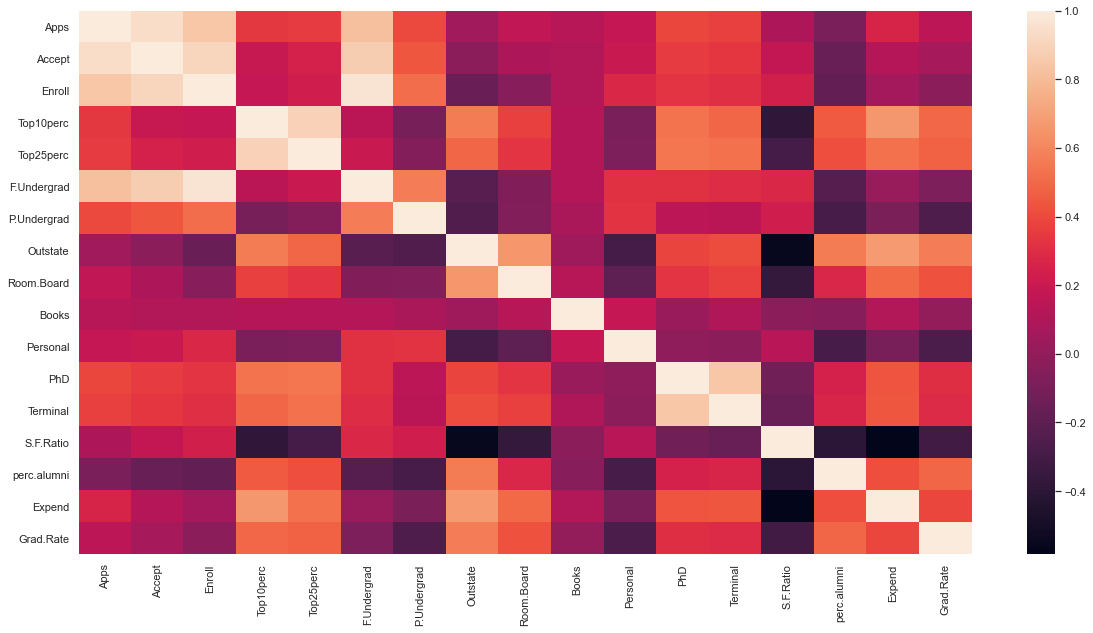

In [128]:
plt.subplots(figsize= (20,10))
sns.heatmap(df_3.corr())

**2.1 Inferece:** 

- No columns have Null values
- The average number of Applications is 3001.
- The number of Applications ranges from 81 to 48094.
- The average number of Acceptances is 2018.
- The number of Acceptances ranges from 72 to 26330.
- The average number of Faculties with PhD is 72.6.
- Applications have the highest correlation with Accept, Enroll and F.Undergrad.

**2.2 Is scaling necessary for PCA in this case? Give justification and perform scaling.**

Scaling **is necessary** in this case as the values vary a lot by scale in different columns. Certain values are in the thousands and certain values are two digit only. Scaling is useful to compare these values. As PCA calculate a new projection based on standard devation, values with high standard deviation will have a higher weight in the calculation.

The primary objective of scaling is to normalize the data in the given range. Scaling also helps speed up the algorithm.

In [155]:
# Z Score Scaling
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std

df_3_std = z_score(df_3.drop("Names", axis=1))
df_3_std

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346659,-0.320999,-0.063468,-0.258416,-0.191704,-0.168008,-0.209072,-0.745875,-0.964284,-0.601924,1.269228,-0.162923,-0.115654,1.013123,-0.867016,-0.501587,-0.318047
1,-0.210748,-0.038678,-0.288398,-0.655234,-1.353040,-0.209653,0.244150,0.457202,1.907979,1.215097,0.235363,-2.673923,-3.376001,-0.477397,-0.544222,0.166003,-0.550907
2,-0.406604,-0.376076,-0.477814,-0.315105,-0.292690,-0.549212,-0.496770,0.201175,-0.553960,-0.904761,-0.259415,-1.204069,-0.930741,-0.300556,0.585558,-0.177176,-0.667337
3,-0.667830,-0.681243,-0.691982,1.839046,1.676532,-0.657656,-0.520416,0.626229,0.996150,-0.601924,-0.687730,1.184443,1.174900,-1.614235,1.150447,1.791697,-0.376262
4,-0.725709,-0.764063,-0.780232,-0.655234,-0.595647,-0.711466,0.009000,-0.716047,-0.216584,1.517934,0.235363,0.204540,-0.523198,-0.553186,-1.674001,0.241648,-2.937721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,-0.207906,-0.205541,-0.255036,-1.335492,-1.504518,-0.125949,0.770939,-0.905706,-0.417186,-0.299088,-0.207721,-0.775362,-1.338284,1.745752,-0.705619,-0.994140,-1.482347
773,-0.269402,-0.087227,-0.091450,-0.201728,-0.444168,-0.175430,0.165329,0.268289,0.549353,0.306586,-0.133874,0.020809,-0.319426,-0.199503,0.666256,-0.090232,1.020897
774,-0.233745,-0.042350,-0.091450,0.365154,0.262732,-0.186975,-0.452762,-0.880103,-0.143637,0.409551,-0.826563,-0.346655,-0.319426,0.078390,-0.221428,-0.256076,-0.958412
775,1.990429,0.177142,0.577960,3.823132,2.181461,0.312775,-0.507280,2.336389,1.962689,0.488288,1.143687,1.429419,1.106976,-2.094233,2.118829,5.884181,1.952337


**2.3 Comment on the comparison between the covariance and the correlation matrices from this data [on scaled data].**

Correlation: measures both the strength and direction of the linear relationship between two variables.

Covariance: is used to measure how to variables change with respect to each other, indicates direction of relation.

In [175]:
# Covariance Matrix:
cov_mat = np.cov(df_3_std.T)
cov_mat

array([[ 1.        ,  0.94345057,  0.84682205,  0.33883368,  0.3516399 ,
         0.81449058,  0.39826427,  0.05015903,  0.16493896,  0.1325586 ,
         0.17873085,  0.39069733,  0.36949147,  0.09563303, -0.09022589,
         0.25959198,  0.1467546 ],
       [ 0.94345057,  1.        ,  0.91163666,  0.19244693,  0.24747574,
         0.87422328,  0.44127073, -0.02575455,  0.09089863,  0.11352535,
         0.20098867,  0.35575788,  0.33758337,  0.17622901, -0.15998987,
         0.12471701,  0.06731255],
       [ 0.84682205,  0.91163666,  1.        ,  0.18129353,  0.22674511,
         0.96463965,  0.5130686 , -0.15547734, -0.04023168,  0.11271089,
         0.28092946,  0.33146914,  0.30827407,  0.23727131, -0.18079413,
         0.06416923, -0.02234104],
       [ 0.33883368,  0.19244693,  0.18129353,  1.        ,  0.89199497,
         0.14128873, -0.10535628,  0.56233054,  0.37148038,  0.11885843,
        -0.0933164 ,  0.53182802,  0.49113502, -0.38487451,  0.45548526,
         0.66091341

In [165]:
# Correlation Matrix

df_3_std.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


**2.4 Check the dataset for outliers before and after scaling. What insight do you derive here? [Please do not treat Outliers unless specifically asked to do so]**

<AxesSubplot:>

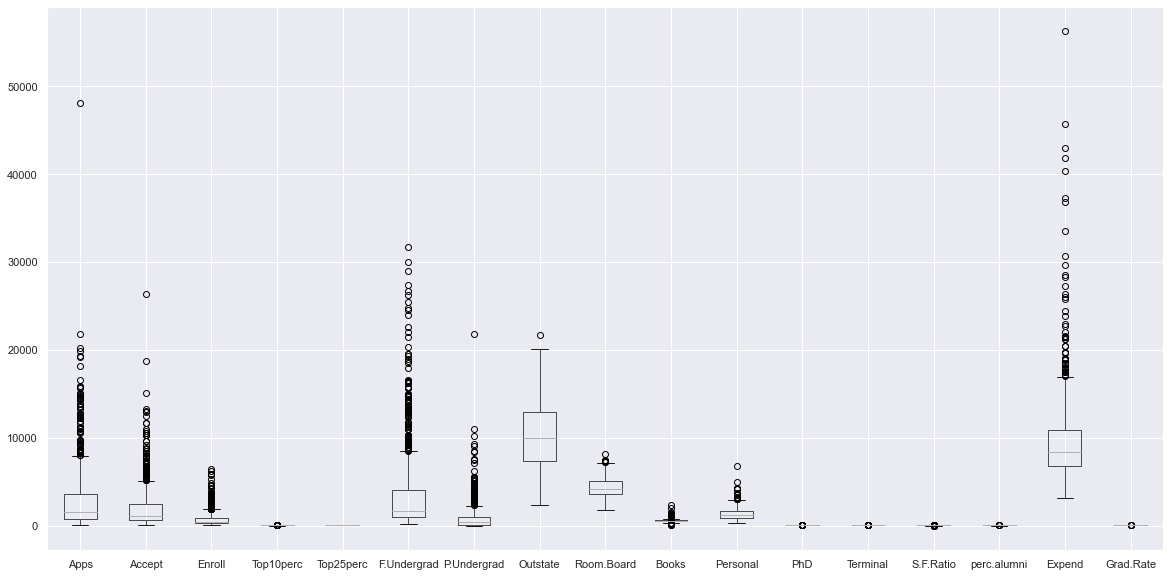

In [166]:
df_3.boxplot(figsize= (20,10))

<AxesSubplot:>

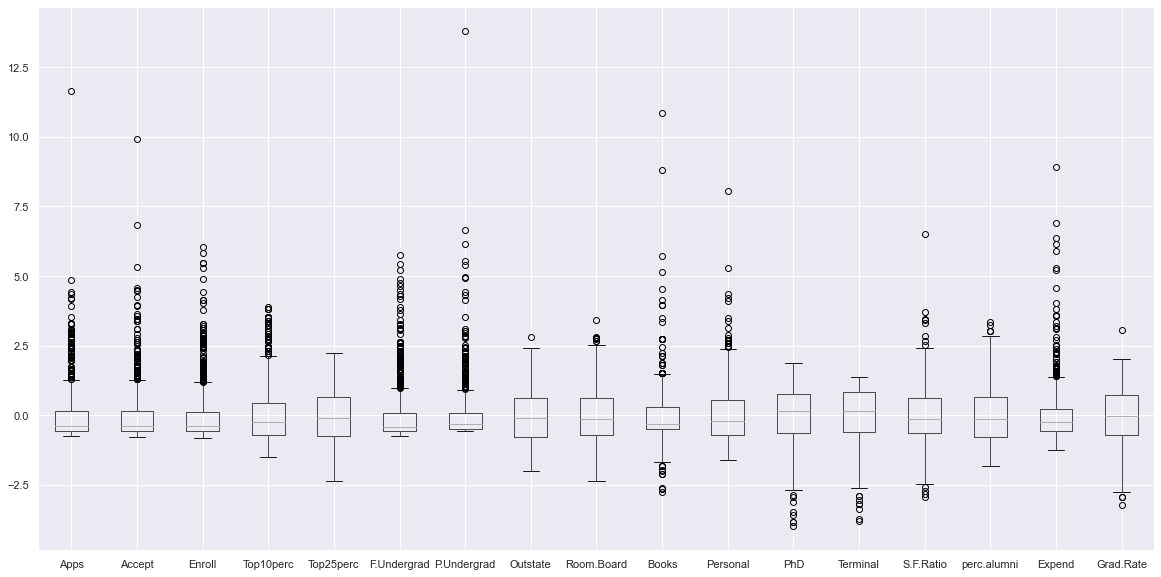

In [167]:
df_3_std.boxplot(figsize= (20,10))

**2.4 Inference:** Scaling reduces the number of outliers

**2.5 Extract the eigenvalues and eigenvectors.[print both]**

In [176]:
val,vec = np.linalg.eig(cov_mat)

print("Eigen Values are: \n")
val

Eigen Values are: 



array([5.44350679, 4.47783645, 1.17315581, 1.00690817, 0.93302887,
       0.84739916, 0.60500815, 0.58711563, 0.52992973, 0.40378256,
       0.02299823, 0.03667818, 0.31304247, 0.08791135, 0.1437932 ,
       0.1675782 , 0.22032704])

In [177]:
print("Eigen Vectors are: \n")
vec

Eigen Vectors are: 



array([[-2.48765602e-01,  3.31598227e-01,  6.30921033e-02,
        -2.81310530e-01,  5.74140964e-03,  1.62374420e-02,
         4.24863486e-02,  1.03090398e-01,  9.02270802e-02,
        -5.25098025e-02,  3.58970400e-01, -4.59139498e-01,
         4.30462074e-02, -1.33405806e-01,  8.06328039e-02,
        -5.95830975e-01,  2.40709086e-02],
       [-2.07601502e-01,  3.72116750e-01,  1.01249056e-01,
        -2.67817346e-01,  5.57860920e-02, -7.53468452e-03,
         1.29497196e-02,  5.62709623e-02,  1.77864814e-01,
        -4.11400844e-02, -5.43427250e-01,  5.18568789e-01,
        -5.84055850e-02,  1.45497511e-01,  3.34674281e-02,
        -2.92642398e-01, -1.45102446e-01],
       [-1.76303592e-01,  4.03724252e-01,  8.29855709e-02,
        -1.61826771e-01, -5.56936353e-02,  4.25579803e-02,
         2.76928937e-02, -5.86623552e-02,  1.28560713e-01,
        -3.44879147e-02,  6.09651110e-01,  4.04318439e-01,
        -6.93988831e-02, -2.95896092e-02, -8.56967180e-02,
         4.44638207e-01,  1.1

**2.6 Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features**

In [186]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
data_reduced = pca.fit_transform(df_3_std)
data_reduced.T

array([[-1.59183007e+00, -2.19099053e+00, -1.43004259e+00, ...,
        -7.32089041e-01,  7.91422962e+00, -4.69205840e-01],
       [ 7.66839571e-01, -5.78457386e-01, -1.09211544e+00, ...,
        -7.71855228e-02, -2.06699746e+00,  3.66424921e-01],
       [-1.01008475e-01,  2.27733123e+00, -4.37810808e-01, ...,
        -4.05380784e-04,  2.07222892e+00, -1.32805971e+00],
       ...,
       [ 6.38032497e-01,  2.36600902e-01, -2.48116274e-01, ...,
        -1.31664350e+00,  8.32740169e-02,  1.30647108e+00],
       [-8.78820069e-01,  4.68951207e-02,  3.08541750e-01, ...,
        -1.28205867e-01, -5.52230138e-01,  6.27005764e-01],
       [ 9.30240250e-02,  1.11306351e+00, -1.05384366e-01, ...,
         2.12237860e-01,  8.19162707e-02,  7.23095807e-01]])

In [179]:
pca.components_

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.0630921 , -0.10124906, -0.08298557,  0.03505553, -0.02414794,
        -0.06139298,  0.13968172,  0.04659887,  0.14896739,  0.67741165,
         0.49972112, -0.12702837, -0.06603755, -0.2898484 , -0.14698927,
         0.22674398, -0.20806465],
       [ 0.28131053,  0.26781735,  0.16182677, -0.05154725, -0.10976654,
         0.10041234, -0.15855849,  0.13129136,  0.18499599,  0.08708922,
        -0.23071057, -0.53472483, -0.51944302, -0.16118949,  0.01731422,
         0.07927349

**2.7 Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]**

[ -0.25,  0.33,  0.06,

-0.28,  0.01,  0.02,

0.04,  0.10,  0.09,

-0.05,  0.36, -0.46,

0.04, -0.13,  0.08,

-0.60,  0.02 ]

**2.8 Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?**

Cumulative Percentage helps us decide how many components to select by showing the percentage of variance that those components were able to show.

It helps us decide the optimum number of principal components by making sure the correct variance in data is represented.

For example: In the diagram below having 9 prinicpal components helps us show more than 90% of the variance, hence 9 may be the ideal number of principal components.

In [193]:
var = np.cumsum(np.round(pca.explained_variance_ratio_,3))*100

var

array([32. , 58.3, 65.2, 71.1, 76.6, 81.6, 85.2, 88.7, 91.8])

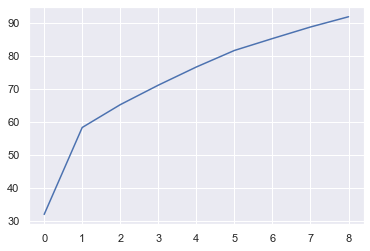

In [194]:
plt.plot(var)

Eigen Vectors indicate the direction of the Principal Components. We can multiply the original data by the them to re-orient our data onto the new axes. 

**Correlation between components and features:**

In [189]:
df_comp = pd.DataFrame(pca.components_,columns = list(df_3_std))
df_comp.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.248766,0.207602,0.176304,0.354274,0.344001,0.154641,0.026443,0.294736,0.249030,0.064758,-0.042529,0.318313,0.317056,-0.176958,0.205082,0.318909,0.252316
1,0.331598,0.372117,0.403724,-0.082412,-0.044779,0.417674,0.315088,-0.249644,-0.137809,0.056342,0.219929,0.058311,0.046429,0.246665,-0.246595,-0.131690,-0.169241
2,-0.063092,-0.101249,-0.082986,0.035056,-0.024148,-0.061393,0.139682,0.046599,0.148967,0.677412,0.499721,-0.127028,-0.066038,-0.289848,-0.146989,0.226744,-0.208065
3,0.281311,0.267817,0.161827,-0.051547,-0.109767,0.100412,-0.158558,0.131291,0.184996,0.087089,-0.230711,-0.534725,-0.519443,-0.161189,0.017314,0.079273,0.269129
4,0.005741,0.055786,-0.055694,-0.395434,-0.426534,-0.043454,0.302385,0.222532,0.560919,-0.127289,-0.222311,0.140166,0.204720,-0.079388,-0.216297,0.075958,-0.109268


<AxesSubplot:>

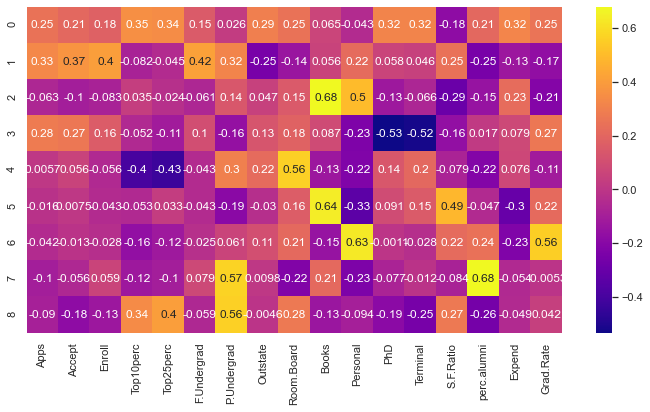

In [191]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap="plasma", annot=True)

**2.9 Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]**

- 9 Principal components are enough to represent more than 90% of the variance in the data.
- The dimensionality of the data can be reduced from 17 to 9.
- PCA 0 explains: Explains Top10perc and Top25perc.
- PCA 1 explains: Enroll and F.Undergrad.
- PCA 2 explains: Books and Personal.
- PCA 3 explains: PhD and Terminal.
- PCA 4 explains: Top10perc, Top25perc and Room.Board.
- PCA 5 explains: Books and Personal.
- PCA 6 explains: Personal and Grad Rate.
- PCA 7 explains: perc.alumini and P.Undergrad.
- PCA 8 explains: P.Undergrad and Top25perc.